In [31]:
import pandas as pd

df_model_kappa = pd.read_csv("../data/score/kappa_models.tsv", sep="\t")
df_model_mcc = pd.read_csv("../data/score/mattcoef_models.tsv", sep="\t")
df_kripp = pd.read_csv("../data/score/kripp_annotator_per_model.tsv", sep="\t")


In [32]:
BAN_ANNOTATORS = [
    "annotator_2@mail.com",
    "annotator_5@mail.com",
    "annotator_6@mail.com",
    "annotator_8@mail.com",
    "annotator_10@mail.com"
]

In [34]:
TOPIC_ORDER = ['Ambiance', 'Emplacement', 'Chambre', 'Rapport qualité-prix', 'Personnel']

In [35]:
kappas = []
mcc = []
for topic in TOPIC_ORDER:
    kappas.extend(df_model_kappa[topic])
    mcc.extend(df_model_mcc[topic])

In [36]:
import scipy.stats as stats
stats.spearmanr(kappas, mcc)

SignificanceResult(statistic=0.997530978708365, pvalue=0.0)

In [37]:
ALIAS_MODEL = {
    "Mistral-Small-3.2-24B-Instruct-2506": "Mistral-3.2-24B",
    "gemma-3-27b-it": "Gemma-3-27B",
    "gemma-3-12b-it": "Gemma-3-12B",
    "Llama-3.1-8B-Instruct": "Llama-3.1-8B",
    "Llama-3.3-70B-Instruct": "Llama-3.3-70B",
    "Mistral-Nemo-Instruct-FP8-2407": "Mistral-Nemo-12B",
    "Ministral-8B-Instruct-2410": "Ministral-8B"
}

In [38]:
TRANSLATION_TOPICS = {
    "Rapport qualité-prix": "Value for Money",
    "Ambiance": "Ambience",
    "Chambre": "Room",
    "Emplacement": "Location",
    "Personnel": "Staff"
}

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load TSV
df_prompt = pd.read_csv("../data/score/mattcoef_prompt.tsv", sep="\t")

df_prompt = df_prompt[~df_prompt['Model'].str.contains('1B|3B|keywords-|Llama-3.3-70B-Instruct-FP8')]
df_prompt = df_prompt[~(df_prompt["annotator_1"].isin(BAN_ANNOTATORS) & df_prompt["annotator_2"].isin(BAN_ANNOTATORS) & df_prompt["V"] == "full")]
df_prompt[df_prompt['annotator_1'].str.contains('@') & df_prompt['annotator_2'].str.contains('@')]

df_prompt = df_prompt.melt(
    id_vars=['Model', 'annotator_1', 'annotator_2', 'V'],  # keep identifier columns
    value_vars=TOPIC_ORDER,  # the topic columns to melt
    var_name='Topic',
    value_name='Kappa'
)

# Apply ALIAS_MODEL to the 'Model' column
df_prompt['Model'] = df_prompt['Model'].map(ALIAS_MODEL).fillna(df_prompt['Model'])

# Apply TRANSLATION_TOPICS to the 'Topic' column
df_prompt['Topic'] = df_prompt['Topic'].map(TRANSLATION_TOPICS).fillna(df_prompt['Topic'])

df_model = pd.read_csv("../data/score/mattcoef_models.tsv", sep="\t")


# 2. Remove rows where either model contains '1B' or '3B'
df_model = df_model[~df_model['Model_1'].str.contains('1B|3B|keywords-|Llama-3.3-70B-Instruct-FP8')]
df_model = df_model[~df_model['Model_2'].str.contains('1B|3B|keywords-|Llama-3.3-70B-Instruct-FP8')]

# 2. Keep only rows where both annotators contain '@'
df_model = df_model[df_model['Annotator_1'].str.contains('@') & df_model['Annotator_2'].str.contains('@')]
df_model = df_model[df_model["Annotator_1"] == df_model["Annotator_2"]]

df_model = df_model[~(df_model["Annotator_1"].isin(BAN_ANNOTATORS) & df_model["Annotator_2"].isin(BAN_ANNOTATORS) & df_model["V"] == "full")]


# Then melt into long format
df_model = df_model.melt(
    id_vars=['Model_1', 'Model_2', 'Annotator_1', 'Annotator_2', 'V'],
    value_vars=TOPIC_ORDER,   # your list of topic columns
    var_name='Topic',
    value_name='Kappa',
)

df_model['Topic'] = df_model['Topic'].map(TRANSLATION_TOPICS).fillna(df_prompt['Topic'])
df_model['Model_1'] = df_model['Model_1'].map(ALIAS_MODEL).fillna(df_model['Model_1'])
df_model['Model_2'] = df_model['Model_2'].map(ALIAS_MODEL).fillna(df_model['Model_2'])


df_model['Model'] = df_model['Model_1'] + ' X ' + df_model['Model_2']

In [40]:
df_kripp = pd.read_csv("../data/score/kripp_models.tsv", sep="\t")


df_kripp = df_kripp[~df_kripp['Model_1'].str.contains('1B|3B|keywords-|Llama-3.3-70B-Instruct-FP8')]
df_kripp = df_kripp[~df_kripp['Model_2'].str.contains('1B|3B|keywords-|Llama-3.3-70B-Instruct-FP8')]

#df_prompt = df_prompt[~(df_prompt["Annotator_1"].isin(BAN_ANNOTATORS) & df_prompt["Annotator_2"].isin(BAN_ANNOTATORS) & df_prompt["V"] == "full")]

df_kripp = df_kripp.melt(
    id_vars=['Model_1', 'Model_2', 'V'],
    value_vars=TOPIC_ORDER,   # your list of topic columns
    var_name='Topic',
    value_name='Kappa',
)

df_kripp['Topic'] = df_kripp['Topic'].map(TRANSLATION_TOPICS).fillna(df_kripp['Topic'])
df_kripp['Model_1'] = df_kripp['Model_1'].map(ALIAS_MODEL).fillna(df_kripp['Model_1'])
df_kripp['Model_2'] = df_kripp['Model_2'].map(ALIAS_MODEL).fillna(df_kripp['Model_2'])


In [41]:
df_kripp

,Model_1,Model_2,V,Topic,Kappa
0,Mistral-3.2-24B,Gemma-3-27B,sample,Ambience,0.563083
1,Mistral-3.2-24B,Gemma-3-27B,full,Ambience,0.568187
2,Mistral-3.2-24B,Llama-3.1-8B,sample,Ambience,0.482006
3,Mistral-3.2-24B,Llama-3.1-8B,full,Ambience,0.470843
4,Mistral-3.2-24B,Ministral-8B,sample,Ambience,0.551235
...,...,...,...,...,...
205,Gemma-3-12B,Llama-3.3-70B,full,Staff,0.941351
206,Gemma-3-12B,Mistral-Nemo-12B,sample,Staff,0.906458
207,Gemma-3-12B,Mistral-Nemo-12B,full,Staff,0.906560
208,Llama-3.3-70B,Mistral-Nemo-12B,sample,Staff,0.910035


In [42]:
d_prompt= dict()
for m, t, k in zip(df_prompt['Model'], df_prompt['Topic'], df_prompt['Kappa']):
    if m not in d_prompt: d_prompt[m] = {t: [] for t in TRANSLATION_TOPICS.values()}
    d_prompt[m][t].append(k)


In [43]:
d_model = dict()
for m1, m2, t, k in zip(df_model['Model_1'], df_model['Model_2'], df_model['Topic'], df_model['Kappa']):
    if m1 not in d_model: d_model[m1] = {m: {t: [] for t in TRANSLATION_TOPICS.values()} for m in ALIAS_MODEL.values() if m != m1}
    if m2 not in d_model: d_model[m2] = {m: {t: [] for t in TRANSLATION_TOPICS.values()} for m in ALIAS_MODEL.values() if m != m2}
    d_model[m1][m2][t].append(k)
    d_model[m2][m1][t].append(k)

In [44]:
d_kripp = dict()
for m1, m2, t, k in zip(df_kripp['Model_1'], df_kripp['Model_2'], df_kripp['Topic'], df_kripp['Kappa']):
    if m1 not in d_kripp: d_kripp[m1] = {m: {t: [] for t in TRANSLATION_TOPICS.values()} for m in ALIAS_MODEL.values() if m != m1}
    if m2 not in d_kripp: d_kripp[m2] = {m: {t: [] for t in TRANSLATION_TOPICS.values()} for m in ALIAS_MODEL.values() if m != m2}
    d_kripp[m1][m2][t] = k
    d_kripp[m2][m1][t] = k

In [45]:
d_kripp['Ministral-8B']['Gemma-3-12B']

{'Value for Money': 0.5410781864545969,
 'Ambience': 0.4713887277478862,
 'Room': 0.5547143582905916,
 'Location': 0.8149536913563564,
 'Staff': 0.8605776081947812}

In [46]:
d_kripp['Gemma-3-12B']['Ministral-8B']

{'Value for Money': 0.5410781864545969,
 'Ambience': 0.4713887277478862,
 'Room': 0.5547143582905916,
 'Location': 0.8149536913563564,
 'Staff': 0.8605776081947812}

In [47]:

from scipy.stats import wilcoxon


In [48]:
d_kripp

{'Mistral-3.2-24B': {'Gemma-3-27B': {'Value for Money': 0.6293778098824625,
   'Ambience': 0.5681874316581685,
   'Room': 0.7870226385880844,
   'Location': 0.8720394395220729,
   'Staff': 0.9394662289780896},
  'Gemma-3-12B': {'Value for Money': 0.6714216503681242,
   'Ambience': 0.5479308869637083,
   'Room': 0.7347184305565903,
   'Location': 0.8756982536445521,
   'Staff': 0.9303816107799852},
  'Llama-3.1-8B': {'Value for Money': 0.5564902353745173,
   'Ambience': 0.4708428533929858,
   'Room': 0.7203465614548965,
   'Location': 0.7832766010506491,
   'Staff': 0.8615460335632339},
  'Llama-3.3-70B': {'Value for Money': 0.6749564344482586,
   'Ambience': 0.5371855013996667,
   'Room': 0.7914791055092618,
   'Location': 0.8788656515945494,
   'Staff': 0.9364448704012656},
  'Mistral-Nemo-12B': {'Value for Money': 0.630498299011806,
   'Ambience': 0.5169234273491783,
   'Room': 0.6703057869998301,
   'Location': 0.8573560294414778,
   'Staff': 0.8993435937475962},
  'Ministral-8B': {

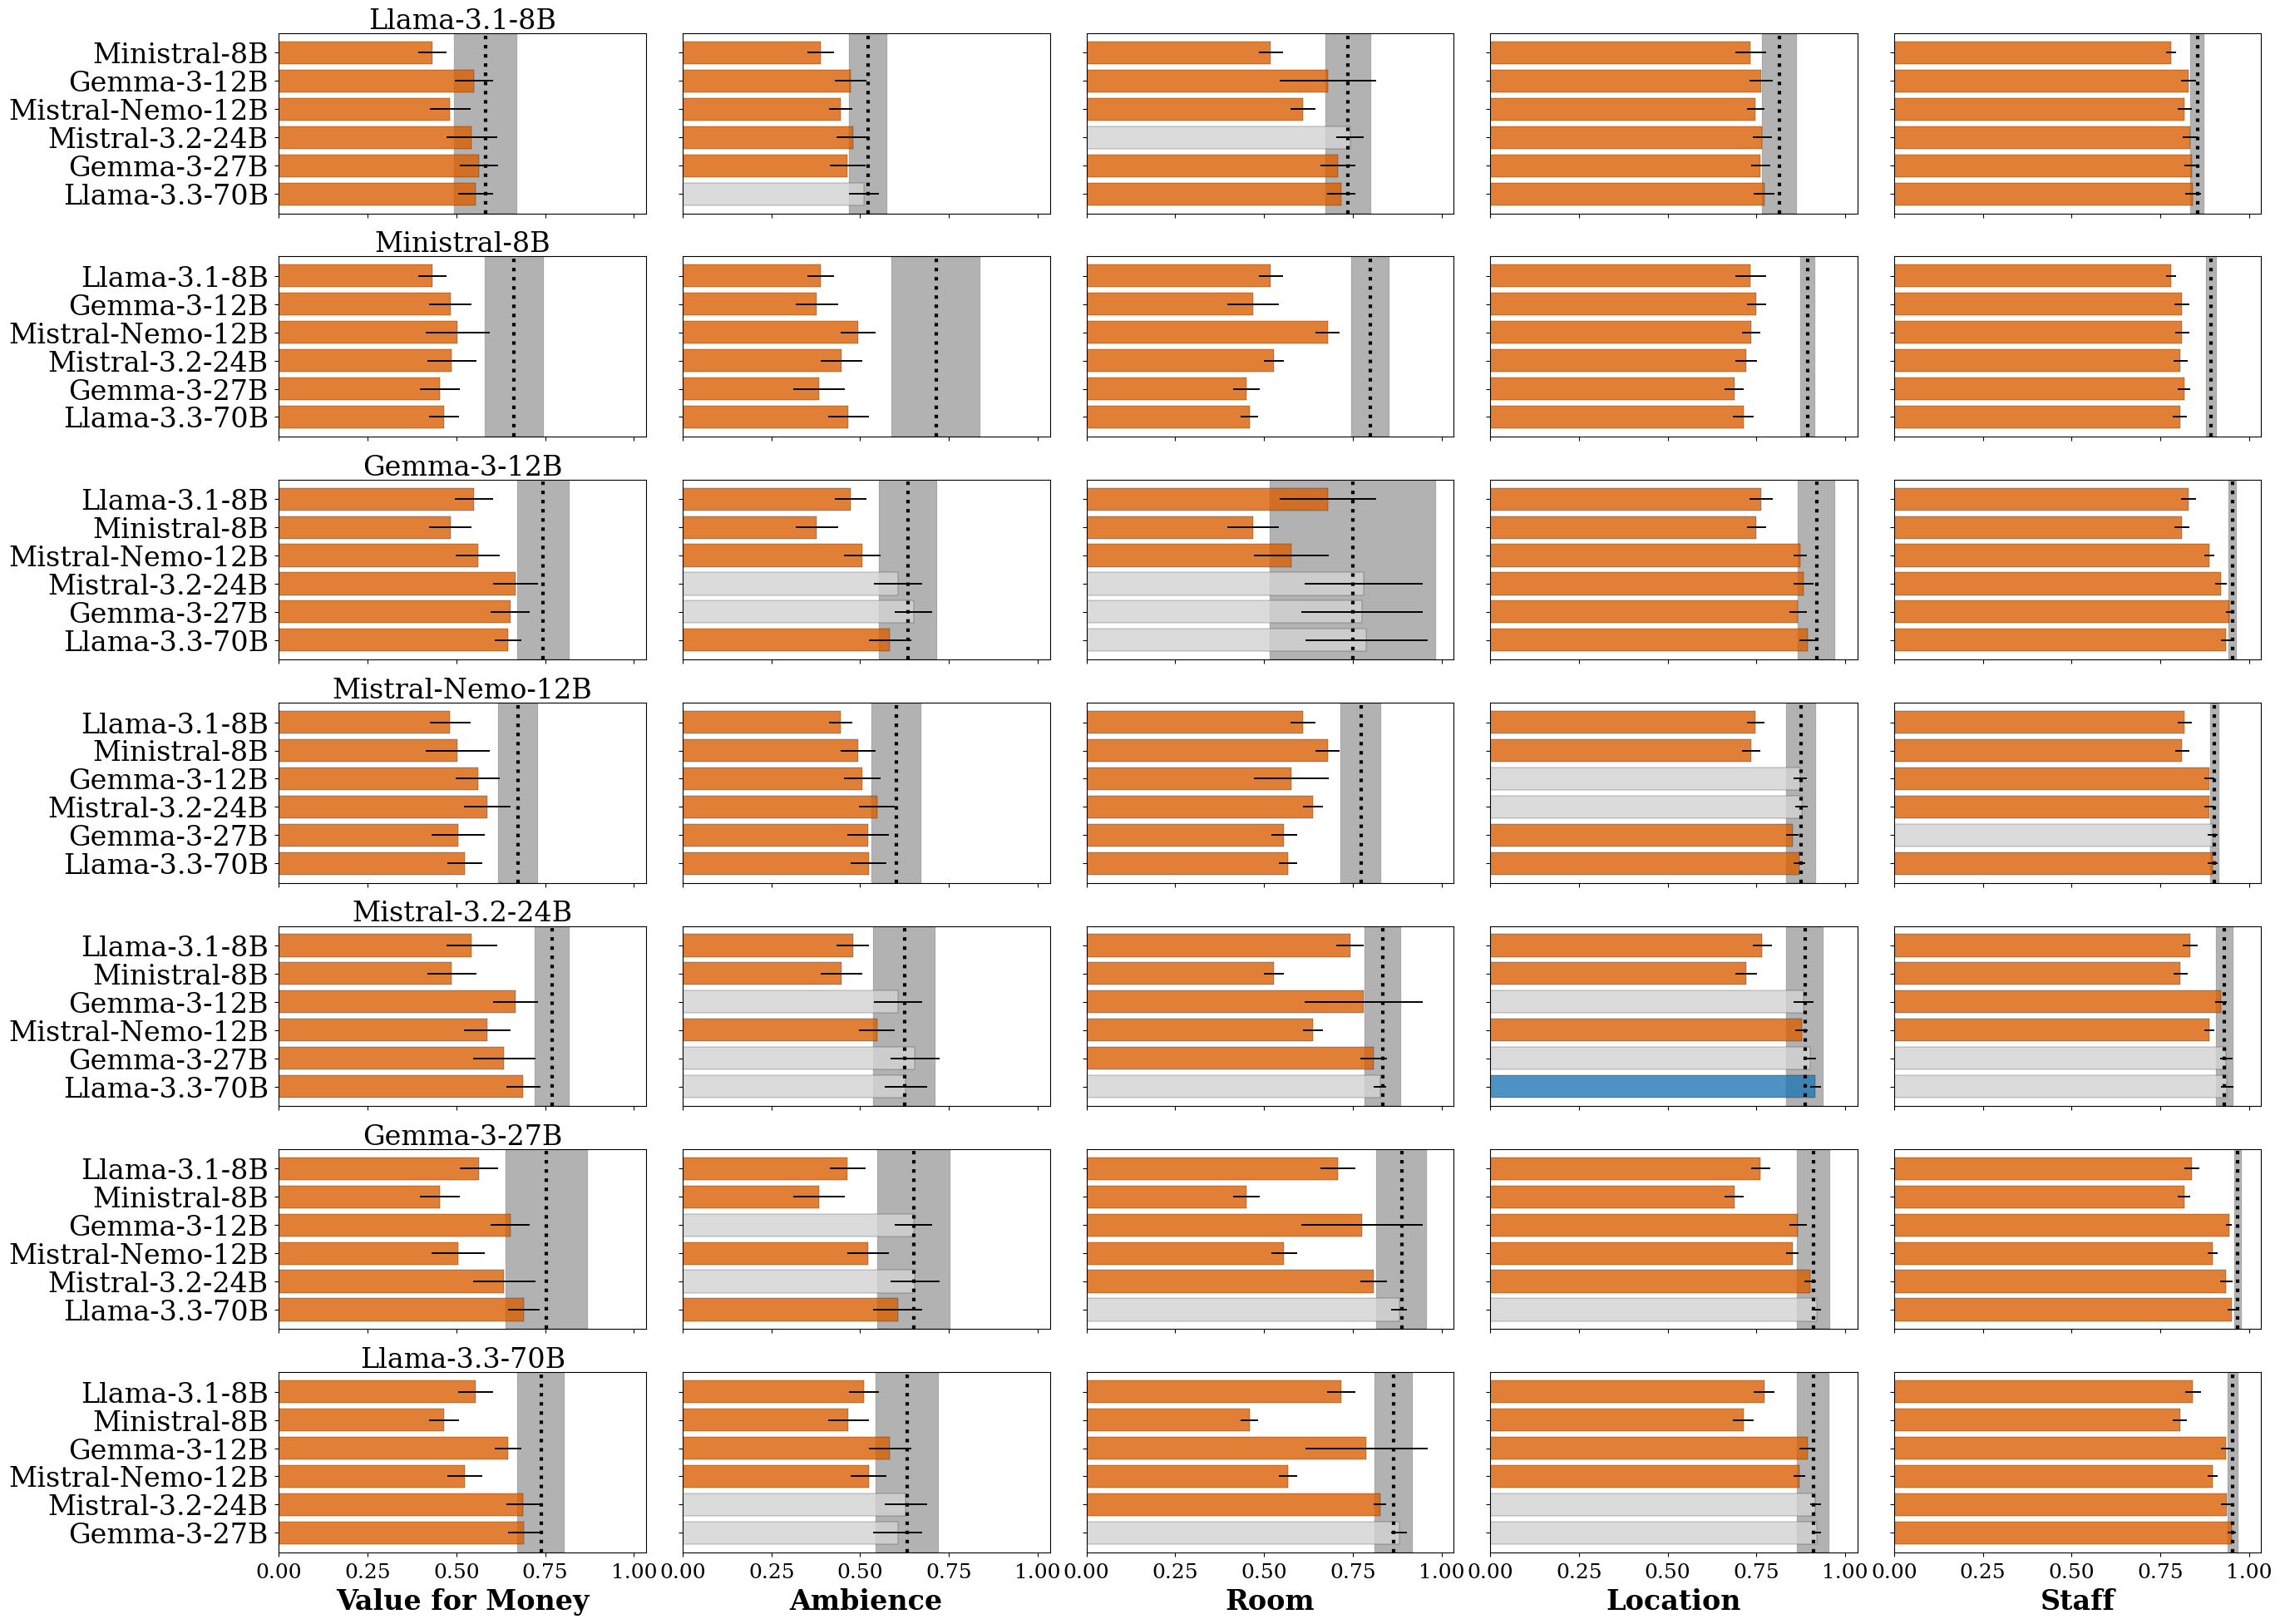

In [61]:
import matplotlib.pyplot as plt
import numpy as np
DIRECTION = {
    'NS': 0,
    'MB': 1,
    'UB': -1,
}

# -------------------------------------------------------------------
# Step 0. (Assumed) Input data structures:
# d_model: nested dict -> {key_model: {pair_model: {topic: [values]}}}
# d_prompt: nested dict -> {key_model: {topic: [values]}}
# -------------------------------------------------------------------

# -------------------------------------------------------------------
# Step 1. Compute mean and variance per model and topic
# -------------------------------------------------------------------
mean_data = {}
for key_model, pair_models in d_model.items():
    mean_data[key_model] = {}
    for pair_model, topics in pair_models.items():
        for topic, values in topics.items():
            mean_data[key_model].setdefault(topic, {})[pair_model] = np.mean(values)

mean_prompt, std_prompt = {}, {}
for key_model, topics in d_prompt.items():
    mean_prompt[key_model], std_prompt[key_model] = {}, {}
    for topic, scores in topics.items():
        mean_prompt[key_model][topic] = np.mean(scores)
        std_prompt[key_model][topic] = np.std(scores)

# -------------------------------------------------------------------
# Step 2. Prepare figure grid
# -------------------------------------------------------------------
key_models = list(mean_data.keys())
key_models = sorted(
    key_models,
    key=lambda x: (int(x.split('-')[-1][0:-1]), x.split('-')[0])
)

topics = list(next(iter(mean_data.values())).keys())

from scipy.stats import mannwhitneyu

# -------------------------------------------------------------------
ttest_results = {}  # Structure: {key_model: {topic: {(pair1, pair2): p_value}}}




# Replace your previous loop with bootstrap test
for key_model, pair_models in d_model.items():
    ttest_results[key_model] = {}
    for topic in topics:
        values_prompt = d_prompt[key_model][topic]
        ttest_results[key_model][topic] = {}
        pairs = list(pair_models.keys())
        for pair in pairs:
            values_pair = pair_models[pair][topic]
            
            U2, p2 = mannwhitneyu(values_prompt, values_pair, alternative="two-sided")

            alpha = 0.05

            if p2 >= alpha:
               
                direction = DIRECTION['NS']
                p1 = 1
                U1 = 0
                
            else:
                # Significant → determine direction from medians
                median_x = np.median(values_prompt)
                median_y = np.median(values_pair)
                
                if median_x > median_y:
                    direction = DIRECTION['MB']
                    U1, p1 = mannwhitneyu(values_prompt, values_pair, alternative="greater")
                elif median_x < median_y:
                    direction = DIRECTION['UB']
                    U1, p1 = mannwhitneyu(values_prompt, values_pair, alternative="less")

            ttest_results[key_model][topic][pair] = (direction, p1)

n_rows, n_cols = len(key_models), len(topics)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(5.5 * n_cols, 2.8 * n_rows),
    sharex=True, sharey=False
)

plt.style.use('seaborn-v0_8-paper')
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 11
})

# -------------------------------------------------------------------
# Step 3. Plot each subplot
# -------------------------------------------------------------------
# -------------------------------------------------------------------
# Step 3. Plot each subplot with std bars (no scatter)
# -------------------------------------------------------------------
for i, key_model in enumerate(key_models):
    for j, topic in enumerate(topics):
        # Robust indexing for 1D or 2D axes
        if n_rows > 1 and n_cols > 1:
            ax = axes[i, j]
        elif n_rows == 1 and n_cols > 1:
            ax = axes[j]
        elif n_rows > 1 and n_cols == 1:
            ax = axes[i]
        else:
            ax = axes

        # Sort pair models
        pair_models = list(mean_data[key_model][topic].keys())
        pair_models = sorted(
            pair_models,
            key=lambda x: (int(x.split('-')[-1][0:-1]), x.split('-')[0]),
        )[::-1]

        # Compute mean and std per pair model
        means = [np.mean(d_model[key_model][pm][topic]) for pm in pair_models]
        stds = [np.std(d_model[key_model][pm][topic]) for pm in pair_models]
        y_pos = np.arange(len(pair_models))

        # Prompt reference
        prompt_mean = mean_prompt.get(key_model, {}).get(topic)
        prompt_std = std_prompt.get(key_model, {}).get(topic)
        if prompt_mean is None or prompt_std is None:
            continue

        var_low, var_high = prompt_mean - prompt_std, min(prompt_mean + prompt_std, 1.0)
        ax.axvspan(var_low, var_high, color='black', alpha=0.3, label='Prompt ± 1σ')

        orientations = [ttest_results[key_model][topic][pm][0] for pm in pair_models]



        colors = []
        hatches = []
        edges = []
        for pm in pair_models:
            o = ttest_results[key_model][topic][pm][0]
            kripp = d_kripp[key_model][pm][topic]


            # if kripp > 0.8:
            #     colors.append("lightgrey")
            #     if o == DIRECTION['MB']:
            #         edges.append("red")
            #         hatches.append("//")
            #     elif o == DIRECTION['UB']:
            #         edges.append("blue")
            #         hatches.append("//")
            #     elif o == DIRECTION['NS']:
            #         edges.append("black")
            #         hatches.append("//")
            
            if o == DIRECTION['MB']:
                colors.append("#d95f02")
            elif o == DIRECTION['UB']:
                colors.append("#1f78b4")
            elif o == DIRECTION['NS']:
                colors.append("lightgray")
            
            if kripp > .8:
                hatches.append("")
            else:
                hatches.append("")
            edges.append("black")


           


            # if p > 0.05:
            #     colors.append("lightgrey")
            #     hatches.append("")
            #     continue
            # if o:
            #     colors.append("gold")
            # else:
            #     colors.append("purple")

        # Plot bars with std as error bars
        bars = ax.barh(y_pos, means, xerr=stds, color=colors, alpha=0.8, zorder=2, capsize=4)

        # Apply hatch individually
        for bar, hatch, e in zip(bars, hatches, edges):
            bar.set_hatch(hatch)
            bar.set_edgecolor(e)

        # Reference line for prompt mean
        ax.axvline(prompt_mean, color='black', linestyle=':', linewidth=3, label='Prompt mean')

        # --- Titles and labels ---
        if i == n_rows-1:
            # Positionner le texte en bas du subplot
            ax.text(
                0.5,          # position horizontale (0 = gauche, 1 = droite)
                -0.2,         # position verticale (0 = bas de l'axe, <0 = sous le subplot)
                topic,        # le texte
                fontsize=24,
                fontweight='bold',
                ha='center',  # centrer horizontalement
                va='top',     # alignement vertical
                transform=ax.transAxes  # coordonnées relatives à l'axe
            )
        if j == 0:
            ax.set_xlabel(key_model, fontsize=24, fontweight='medium')
            ax.xaxis.set_label_position('top')  # Move label to the top
            ax.set_yticks(y_pos)
            ax.set_yticklabels(pair_models, fontsize=24)
        else:
            ax.set_yticks(y_pos)
            ax.set_yticklabels([""] * len(pair_models))
            ax.set_xlabel(' ', fontsize=24, fontweight='medium')
            ax.xaxis.set_label_position('top')  # Move label to the top
        ax.tick_params(axis='x', labelsize=18)  # <-- Add this line


        # # Optional: x-axis label only on bottom row
        # if i == n_rows - 1:
        #     ax.set_xlabel("MCC", fontsize=12)
    


# Tight layout for publication
plt.tight_layout()
plt.savefig(f"model_bias_mcc.png", bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()
